In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("poster")

# Setup

Questo notebook richiede l'installazione del pacchetto tensorflow, per le istruzioni di installazione occorre andare alla pagina:

https://www.tensorflow.org/install/ 

e seguire le istruzioni in base al proprio sistema operativo.

Per esempio per chi usa Windows è sufficiente lanciare da terminale il comando:

```
pip install --ignore-installed --upgrade tensorflow 
```

# Caricamento dati

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
def display_digit(num):
    #print(y_train[num])
    label = y_train[num]
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))

def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (10000, 784)
y_train Examples Loaded = (10000, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (5000, 784)
y_test Examples Loaded = (5000, 10)


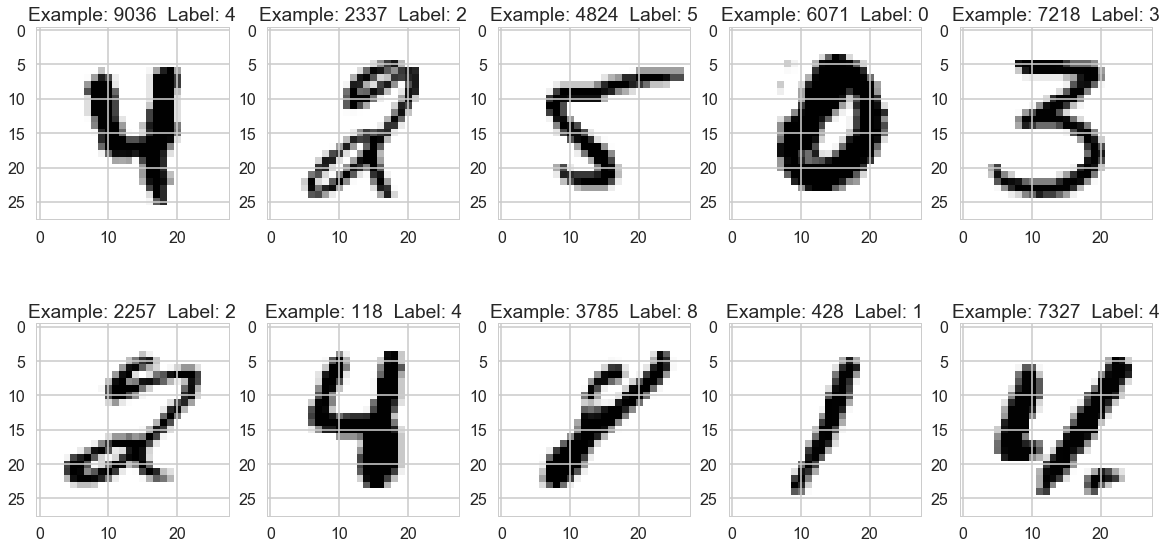

In [4]:
# define the train and the test dataset [foglio] 
x_train, y_train = TRAIN_SIZE(10000)
x_test, y_test = TEST_SIZE(5000)

# redefine the y, avoiding to use the vector representation.
y_train = np.dot(y_train,np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]).reshape(10,1))[:,0]
y_test = np.dot(y_test,np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]).reshape(10,1))[:,0]

# Plot 10 random images
fig = plt.figure(0,figsize=(20, 10))
for i in np.arange(10):
    plt.subplot(2,5,i+1)
    num = np.random.randint(0, x_train.shape[0])
    plt.imshow(x_train[num].reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.title('Example: %d  Label: %d' % (num, y_train[num]))
    

# Regressione logistica

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(penalty='l2', C = 1e9, n_jobs = -1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc_score = accuracy_score(y_test, y_pred)

print("Accuracy score:")
print(acc_score)

Accuracy score:
0.8264


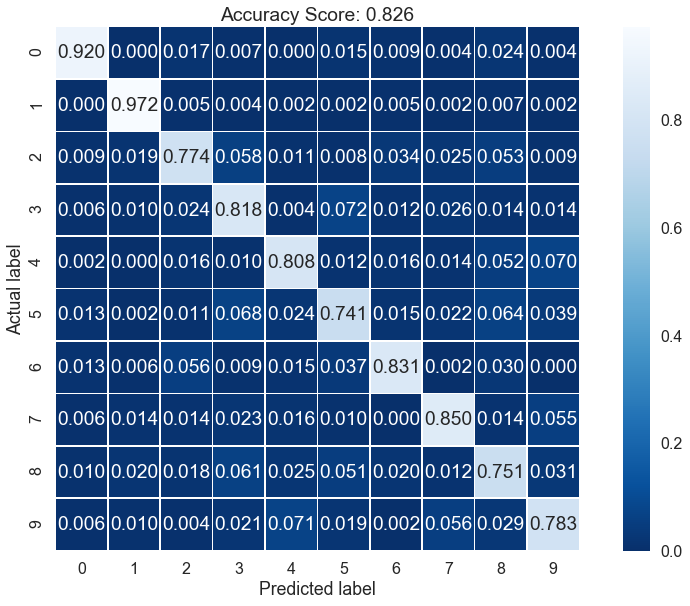

In [6]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {:.3f}'.format(acc_score))
plt.tight_layout()

In [7]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

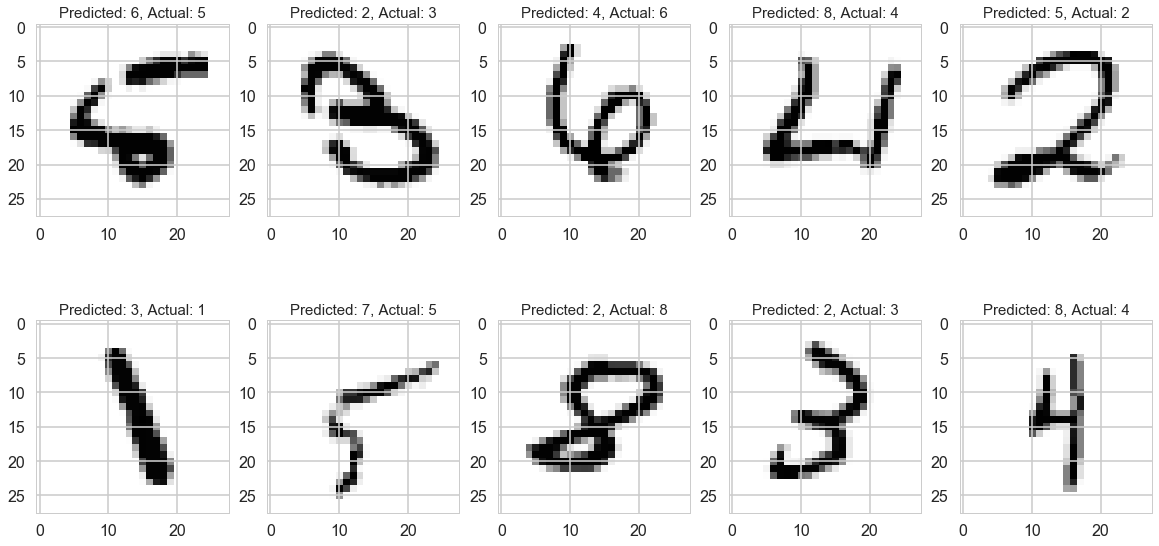

In [8]:
plt.figure(figsize=(20,10))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:10]):
    plt.subplot(2, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (28,28)))
    plt.title('Predicted: {}, Actual: {}'.format(int(y_pred[badIndex]), int(y_test[badIndex])), fontsize = 15)

# Regressione logistica regolarizzata

In [9]:
# [time consuming]
from sklearn.model_selection import GridSearchCV

# the tuned parameters C is the inverse of the regularization parameters
tuned_parameters = [{'C': [0.01, 0.1, 1]}]

clf = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, cv=10,
                       scoring='accuracy',n_jobs = -1)
clf.fit(x_train, y_train)

print("Best parameters set found on training set:")
print(clf.best_params_['C'])
print()

y_pred = clf.predict(x_test)

acc_score = accuracy_score(y_test, y_pred)

print("Accuracy score:")
print(acc_score)

Best parameters set found on training set:
0.1

Accuracy score:
0.8808


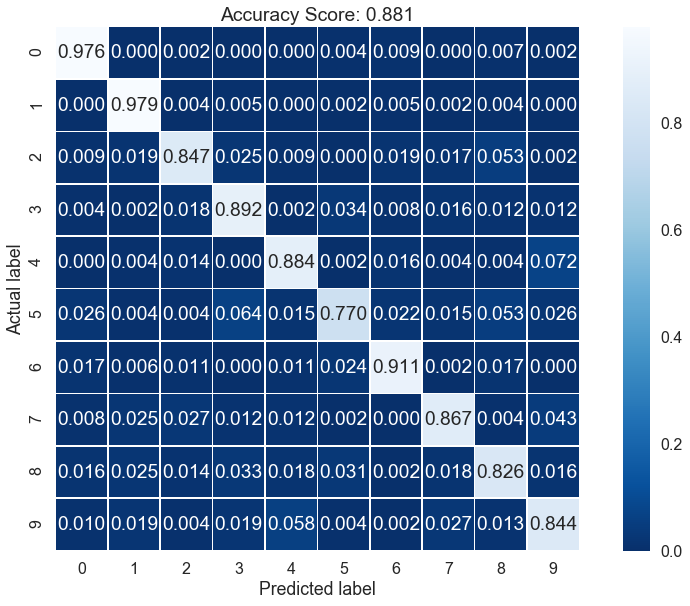

In [10]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {:.3f}'.format(acc_score))
plt.tight_layout()

# Rete neurale 

In [11]:
# Start TensorFlow InteractiveSession [connection to C++ backend]

import tensorflow as tf
sess = tf.InteractiveSession()

In [12]:
# Let's build the graph:
# Use the placeholders for the creation of nodes of input/ouput
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# The variables are the weights W and biases b of the model.
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# Inizialize the variables in the session
sess.run(tf.global_variables_initializer())

# Implement the regression model
y = tf.matmul(x,W) + b

# define the loss function as the cross entropy:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

# Train the model
#The returned operation train_step, when run, will apply the gradient descent updates to the parameters. 
#Training the model can therefore be accomplished by repeatedly running train_step.

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [13]:
# Model evaluation
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("Accuracy on test set:")
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Accuracy on test set:
0.9151


# Rete neurale convoluzionale

In [16]:
# Let's define some functions for good initializations (we're using ReLU neurons)
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

#

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [17]:
# Transform the input image to a 4d tensor
x_image = tf.reshape(x, [-1,28,28,1])

In [18]:
# First Convolutional Layer
# Convolution and the Max Pooling
# - Convolution will compute 32 features for each 5x5 patch
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

#we then convolve the image with the weight tensor, add the bias, apply the activaction function (ReLU)
# and finally reduce the size of the image using the max pool
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [19]:
# Second Convolutional Layer
# a DEEP NN has several stacked layer of this type
#the 2nd layer will have 64 features for each 5x5 patch

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [20]:
# Densely Connected Layer
# The image is now a 7x7, we create a fully connected layer with 1024 neurons
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [21]:
# Dropout
# To reduce overfitting, we will apply dropout before the readout layer.

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [22]:
# Redout
# finally a layer just like the softmax regression

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [23]:
# TRAIN AND EVALUATE
# we use ADAM optimizer intstead of GD
# keep_prob in feed dict is a parameter to control droput
# log every 200 iterations
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%200 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.14
step 200, training accuracy 0.86
step 400, training accuracy 0.86
step 600, training accuracy 0.94
step 800, training accuracy 0.98
step 1000, training accuracy 0.96
step 1200, training accuracy 1
step 1400, training accuracy 0.94
step 1600, training accuracy 0.9
step 1800, training accuracy 0.98
step 2000, training accuracy 1
step 2200, training accuracy 0.96
step 2400, training accuracy 0.98
step 2600, training accuracy 0.98
step 2800, training accuracy 1
step 3000, training accuracy 0.98
step 3200, training accuracy 1
step 3400, training accuracy 0.98
step 3600, training accuracy 1
step 3800, training accuracy 0.98
step 4000, training accuracy 1
step 4200, training accuracy 0.96
step 4400, training accuracy 0.98
step 4600, training accuracy 0.98
step 4800, training accuracy 0.98
step 5000, training accuracy 1
step 5200, training accuracy 0.98
step 5400, training accuracy 1
step 5600, training accuracy 1
step 5800, training accuracy 1
step 6000, trainin